### 1. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 2. Getting insights from the Data-Set

In [2]:
data = pd.read_csv('/kaggle/input/customer-churn-prediction-dataset/customer_churn_prediction_dataset.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,300.000000,300.000000,300.000000,300.000000
mean,0.543333,35.783333,67.226800,2477.975767
std,0.498951,21.113400,28.638073,1918.540111
min,0.000000,1.000000,18.450000,30.030000
25%,0.000000,17.000000,42.337500,910.302500
50%,1.000000,36.000000,68.635000,2072.400000
75%,1.000000,53.250000,92.430000,3618.405000
max,1.000000,72.000000,118.640000,8318.880000


In [5]:
#Percentage of missing values in the dataset
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


Nice! we do not have any missing values in the dataset! this is good

Will do some label Encoding for the categorical values now

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                    'PaymentMethod', 'Churn']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Print the first few rows to check
print(data.head())

  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0001-XXXX       1              0        1           1       5   
1  0002-XXXX       0              0        0           0      42   
2  0003-XXXX       1              0        0           0      61   
3  0004-XXXX       1              1        0           1      22   
4  0005-XXXX       1              1        1           1      21   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              2                2               0  ...   
1             1              1                0               2  ...   
2             1              1                2               0  ...   
3             1              0                2               1  ...   
4             0              0                0               0  ...   

  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                0            0            0                1         0   
1       

Done!

### 3. Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


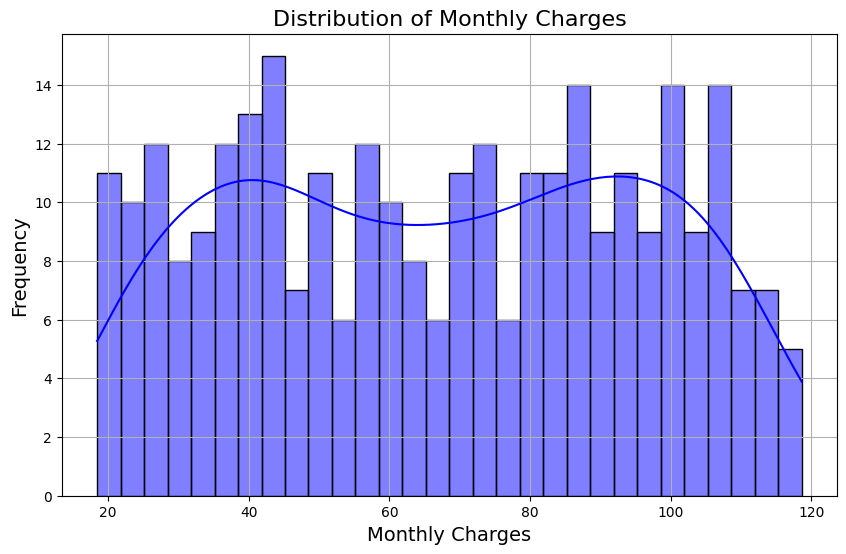

In [7]:
import seaborn as sns

# Distribution of Monthly Charges
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Monthly Charges', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


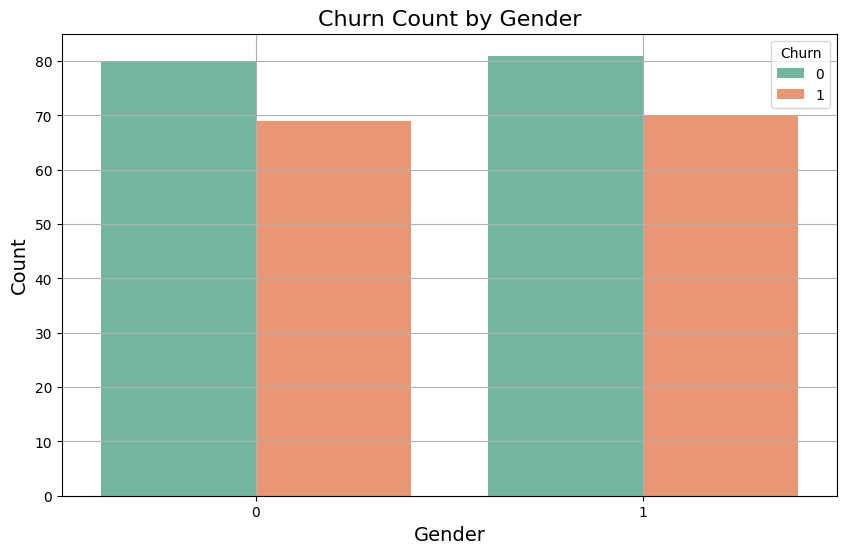

In [8]:
# Churn Count by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=data, palette='Set2')
plt.title('Churn Count by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


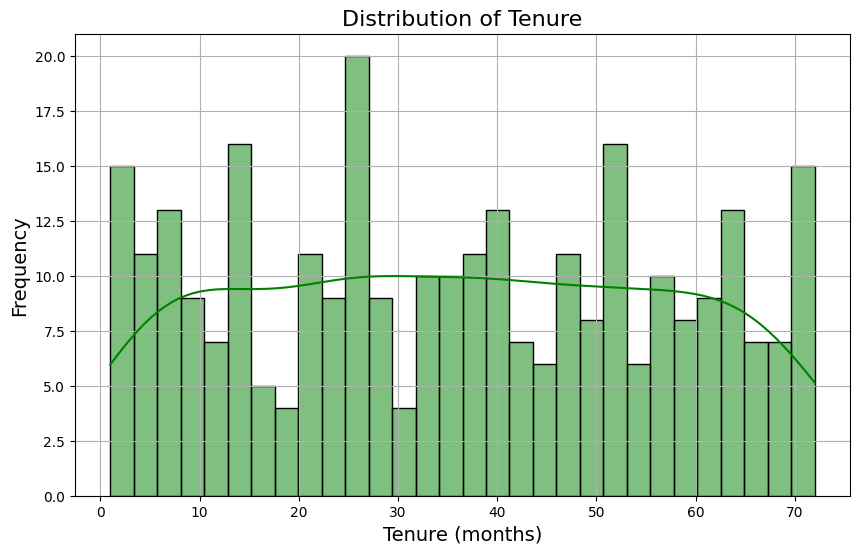

In [9]:
# Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data['tenure'], bins=30, kde=True, color='green')
plt.title('Distribution of Tenure', fontsize=16)
plt.xlabel('Tenure (months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

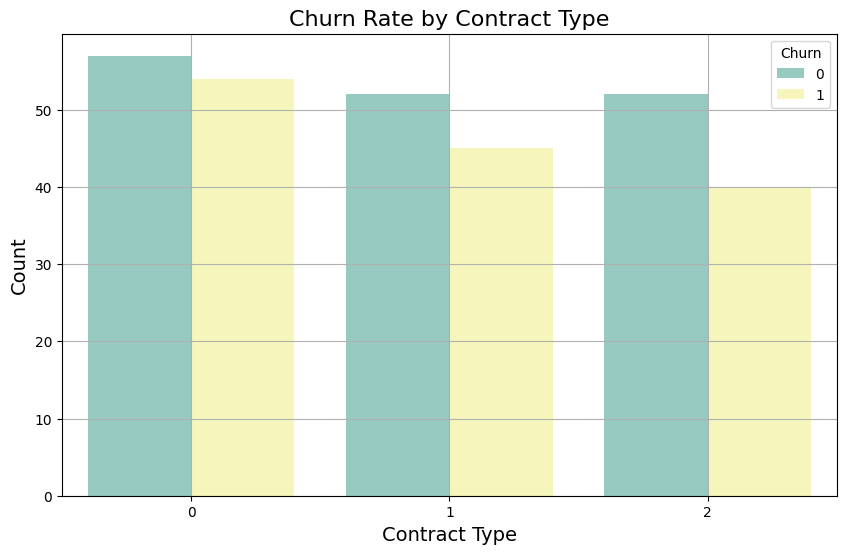

In [10]:
# Churn Rate by Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set3')
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()

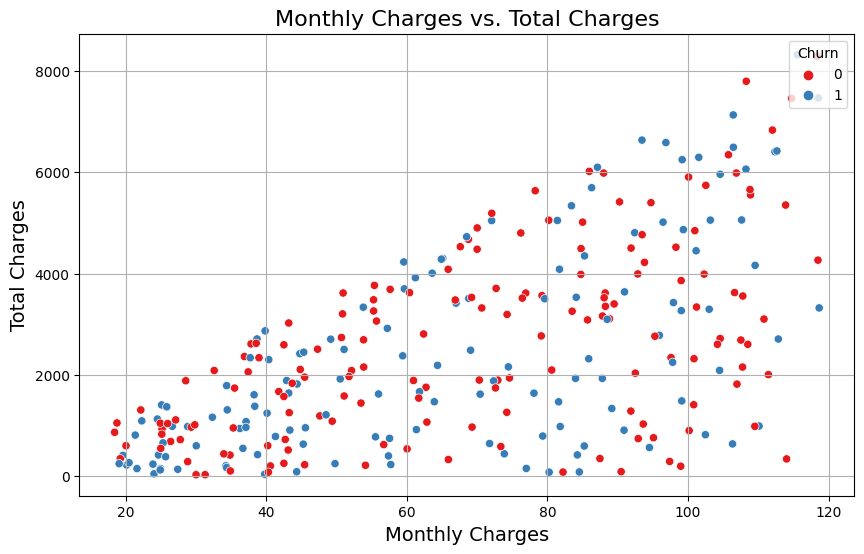

In [11]:
# Monthly Charges vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data, palette='Set1')
plt.title('Monthly Charges vs. Total Charges', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Total Charges', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()


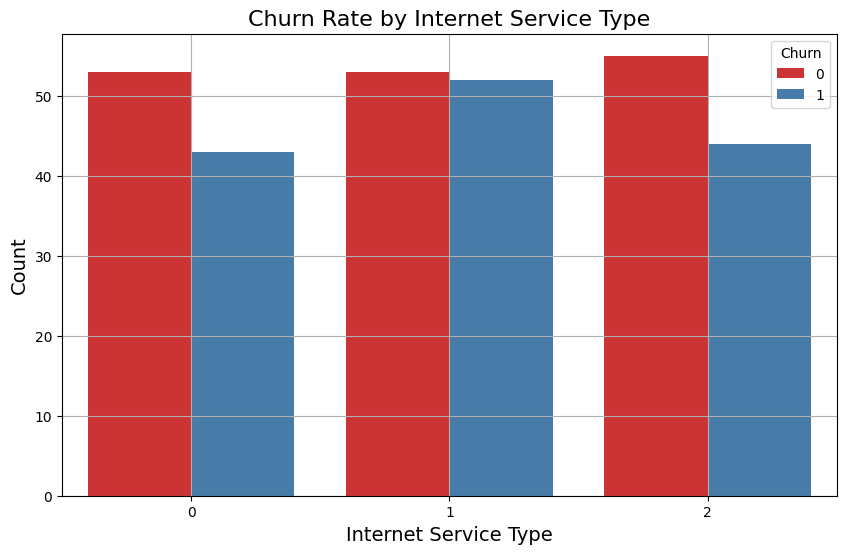

In [12]:
# Churn Rate by Internet Service Type
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=data, palette='Set1')
plt.title('Churn Rate by Internet Service Type', fontsize=16)
plt.xlabel('Internet Service Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()

### 4. Modelling

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define feature columns and target variable
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 
            'MonthlyCharges', 'TotalCharges']
target = 'Churn'

# Convert target variable to numeric
data[target] = data[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Select the top 10 features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = np.array(X.columns)[selector.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
['TechSupport' 'StreamingTV' 'StreamingMovies' 'Contract'
 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges' 'TotalCharges'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes']


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy}")

Random Forest Classifier Accuracy: 1.0
